In [1]:
# multiple import packages necessary for data cleaning and model creation.

import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder


In [2]:
# Upload collections_list.xlsx to Colab.  This file is a list of the 100 most popular NFT collections on OpenSea
from google.colab import files

csv_file = files.upload()

Saving collections_list.xlsx to collections_list.xlsx


In [4]:
# Read the collections_list.xlsx file from the Resources folder into a Pandas DataFrame
collections_df = pd.read_excel("collections_list.xlsx",'main')

# Review the DataFrame
#collections_df

In [5]:
#converting the list of collections into a list so we can modify the names to fit the API call
collection_list = [x for x in collections_df['Name']]

In [9]:
#collection_list_two updates the list by replacing spacing with a dash mark.  This is necessary to fit the API
collection_list_two = []
for i in collection_list:
  collection_list_two.append(i.replace(" ", "-"))
 

In [10]:
#collection_list_three updates the previous list to make sure everyting is lowercase.  This is necessary for the API call
collection_list_three = []
for i in collection_list_two:
  collection_list_three.append(i.lower())

In [11]:
#to call the API, we first set an empty DataFrame object.  We then loop through the list of 100 collections and call approximately 50 NFT assets each. 
#the API as a 50 at a time call limit, but we can get around this by looping through multiple 50 NFT api calls.

df = pd.DataFrame()
for collection in collection_list_three:
  
  url = "https://api.opensea.io/api/v1/assets?order_by=sale_count&order_direction=desc&offset=0&limit=50&collection=" + collection

  JSONContent = requests.get(url).json()

  content = json.dumps(JSONContent, indent = 2, sort_keys=True)
#converting JSON content and appending into the once empty pandas dataframe
  JSONContent.keys()

  df = df.append(JSONContent["assets"])

In [ ]:
#df

In [12]:
collection_df = df['collection'].apply(pd.Series)
#collection_df

In [13]:
#Collection Name
collection_name = collection_df["name"].apply(pd.Series)
collection_name.columns = ['Collection Name']
#collection_name

In [14]:
last_sale_df = df['last_sale'].apply(pd.Series)
#last_sale_df

In [15]:
#Last Sale Price in ETH
total_price = last_sale_df['total_price'].apply(pd.Series)
total_price.columns = ['Last Sale Price ETH']
total_price = total_price.astype(float)* 0.000000000000000001
total_price = total_price.fillna(0)
#total_price

In [ ]:
#payment_token_df = last_sale_df['payment_token'].apply(pd.Series)
#payment_token_df

In [ ]:
#Current ETH TO USD price
#usd_price = payment_token_df['usd_price'].apply(pd.Series)
#usd_price.columns = ['ETH TO USD']
#usd_price = usd_price.astype(float)

In [16]:
background_color = df['background_color']
#background_color

In [17]:
df['traits']

0     [{'trait_type': 'Strength', 'value': 3, 'displ...
1     [{'trait_type': 'Eyes', 'value': 'Half Open (A...
2     [{'trait_type': 'Extra', 'value': '0N1 Logo Pi...
3     [{'trait_type': 'Extra', 'value': '0N1 Logo Pi...
4     [{'trait_type': 'Extra', 'value': '0N1 Logo Pi...
                            ...                        
46    [{'trait_type': 'breed_type', 'value': 'genesi...
47    [{'trait_type': 'breed_type', 'value': 'genesi...
48    [{'trait_type': 'breed_type', 'value': 'genesi...
49    [{'trait_type': 'bloodline', 'value': 'Nakamot...
0     [{'trait_type': 'background', 'value': 'Ocean'...
Name: traits, Length: 2852, dtype: object

In [19]:
#Creates New Columns and Lists Asset Traits
traits = df['traits'].apply(pd.Series)
traits.columns = ['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15']

traits

,Trait1,Trait2,Trait3,Trait4,Trait5,Trait6,Trait7,Trait8,Trait9,Trait10,Trait11,Trait12,Trait13,Trait14,Trait15
0,"{'trait_type': 'Strength', 'value': 3, 'displa...","{'trait_type': 'Spirit', 'value': 1, 'display_...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Eyes', 'value': 'Open (Citrine...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Hair', 'value': 'Bob (Rose)', ...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Body', 'value': 'Jasper', 'dis...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Face', 'value': 'Glasses (Obsi...",NaN,NaN
1,"{'trait_type': 'Eyes', 'value': 'Half Open (Az...","{'trait_type': 'Spirit', 'value': 2, 'display_...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Strength', 'value': 5, 'displa...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Face', 'value': 'Bandaid', 'di...","{'trait_type': 'Head', 'value': 'Void', 'displ...","{'trait_type': 'Wear', 'value': 'Bomber Jacket...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Mouth', 'value': 'Smirk', 'dis...","{'trait_type': 'Hair', 'value': 'Spiky (Obsidi...",NaN,NaN
2,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Hair', 'value': 'Spiky (Citrin...","{'trait_type': 'Face', 'value': 'PR Mask (Jasp...","{'trait_type': 'Style', 'value': 5, 'display_t...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Eyes', 'value': 'Squint (Azuri...",NaN,NaN
3,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Wear', 'value': 'Kimono (Rose)...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Head', 'value': 'Headphones (T...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Eyes', 'value': 'Half Open (Ci...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Face', 'value': 'Nose Scar', '...","{'trait_type': 'Hair', 'value': 'Bob (Obsidian...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Strength', 'value': 1, 'displa...",NaN,NaN
4,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Face', 'value': 'Glasses (Pear...","{'trait_type': 'Style', 'value': 1, 'display_t...","{'trait_type': 'Strength', 'value': 3, 'displa...","{'trait_type': 'Spirit', 'value': 5, 'display_...","{'trait_type': 'Eyes', 'value': 'Half Open (Ci...","{'trait_type': 'Head', 'value': 'Pen', 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Wear', 'value': 'Track Jacket ...","{'trait_type': 'Body', 'value': 'Jasper', 'dis...","{'trait_type': 'Mouth', 'value': 'Smirk', 'dis...","{'trait_type': 'Background', 'value': 'Jasper'...","{'trait_type': 'Hair', 'value': 'Ponytail (Ros...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,"{'trait_type': 'breed_type', 'value': 'genesis...","{'trait_type': 'bloodline', 'value': 'Nakamoto...","{'trait_type': 'coat_color', 'value': 'Coral W...","{'trait_type': 'gender', 'value': 'Female', 'd...","{'trait_type': 'genotype', 'value': 'Z1', 'dis...","{'trait_type': 'horse_type', 'value': 'Mare', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,"{'trait_type': 'breed_type', 'value': '

In [ ]:
traits_two = traits.reset_index()
traits_two

,index,Trait1,Trait2,Trait3,Trait4,Trait5,Trait6,Trait7,Trait8,Trait9,Trait10,Trait11,Trait12,Trait13,Trait14,Trait15,Trait16,Trait17,Trait18
0,0,"{'trait_type': 'Strength', 'value': 3, 'displa...","{'trait_type': 'Spirit', 'value': 1, 'display_...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Eyes', 'value': 'Open (Citrine...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Hair', 'value': 'Bob (Rose)', ...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Body', 'value': 'Jasper', 'dis...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Face', 'value': 'Glasses (Obsi...",NaN,NaN,NaN,NaN,NaN
1,1,"{'trait_type': 'Eyes', 'value': 'Half Open (Az...","{'trait_type': 'Spirit', 'value': 2, 'display_...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Strength', 'value': 5, 'displa...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Face', 'value': 'Bandaid', 'di...","{'trait_type': 'Head', 'value': 'Void', 'displ...","{'trait_type': 'Wear', 'value': 'Bomber Jacket...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Extra', 'value': 'Void', 'disp...","{'trait_type': 'Mouth', 'value': 'Smirk', 'dis...","{'trait_type': 'Hair', 'value': 'Spiky (Obsidi...",NaN,NaN,NaN,NaN,NaN
2,2,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Hair', 'value': 'Spiky (Citrin...","{'trait_type': 'Face', 'value': 'PR Mask (Jasp...","{'trait_type': 'Style', 'value': 5, 'display_t...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Head', 'value': 'Headphones (P...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Background', 'value': 'Azurite...","{'trait_type': 'Wear', 'value': 'Thermal Hoodi...","{'trait_type': 'Eyes', 'value': 'Squint (Azuri...",NaN,NaN,NaN,NaN,NaN
3,3,"{'trait_type': 'Extra', 'value': '0N1 Logo Pin...","{'trait_type': 'Wear', 'value': 'Kimono (Rose)...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Head', 'value': 'Headphones (T...","{'trait_type': 'Style', 'value': 3, 'display_t...","{'trait_type': 'Eyes', 'value': 'Half Open (Ci...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Face', 'value': 'Nose Scar', '...","{'trait_type': 'Hair', 'value': 'Bob (Obsidian...","{'trait_type': 'Spirit', 'value': 4, 'display_...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Strength', 'value': 1, 'displa...",NaN,NaN,NaN,NaN,NaN
4,4,"{'trait_type': 'Face', 'value': 'Void', 'displ...","{'trait_type': 'Background', 'value': 'Citrine...","{'trait_type': 'Eyes', 'value': 'Open (Citrine...","{'trait_type': 'Body', 'value': 'Azurite', 'di...","{'trait_type': 'Mouth', 'value': 'Neutral', 'd...","{'trait_type': 'Head', 'value': 'Void', 'displ...","{'trait_type': 'Wear', 'value': 'Bomber Jacket...","{'trait_type': 'Strength', 'value': 4, 'displa...","{'trait_type': 'Type', 'value': 'Y0K-A1', 'dis...","{'trait_type': 'Style', 'value': 1, 'display_t...","{'trait_type': 'Spirit', 'value': 1, 'display_...","{'trait_type': 'Hair', 'value': 'Half-Buzz (Tu...","{'trait_type': 'Extra', 'value': 'Earring (Dou...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,46,"{'trait_type': 'breed_type', 'value': 'genesis...","{'trait_type': 'bloodline', 'value': 'Nakamoto...","{'trait_type': 'coat_color', 'value': 'Coral W...","{'trait_type': 'gender', 'value': 'Female', 'd...","{'trait_type': 'genotype', 'value': 'Z1', 'dis...","{'trait_t

In [ ]:
traits['Trait1']['trait_type']

KeyError: ignored

In [20]:
#Replaces NaN values with 0 and Trait Values with 1
traits[['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15']] = traits[['Trait1', 'Trait2', 'Trait3', 'Trait4',
                  'Trait5', 'Trait6', 'Trait7', 'Trait8',
                  'Trait9', 'Trait10', 'Trait11', 'Trait12',
                  'Trait13', 'Trait14', 'Trait15']].applymap(lambda x: 0 if pd.isnull(x) else 1)

In [21]:
#Calculates Sum of traits
total_traits = traits.apply(lambda row: row.Trait1 + row.Trait2 + row.Trait3
                            + row.Trait4 +row.Trait5 + row.Trait6 + row.Trait7
                            + row.Trait8 + row.Trait9 + row.Trait10 + row.Trait11 
                            + row.Trait12 + row.Trait13 + row.Trait14 + row.Trait15 
                            , axis = 1)

In [22]:
collection_data_df = df[['name', 'token_id', 'num_sales', 'background_color',]].copy()

In [23]:
collection_data_df = pd.concat([collection_data_df, collection_name, total_price, total_traits], axis = 1)
collection_data_df.columns = ['Asset Name', 'Token ID', 'Number of Sales', 'Background Color', 'Collection Name', 'Last Sale Price (ETH)', 'Trait Count']

In [24]:
collection_data_df

,Asset Name,Token ID,Number of Sales,Background Color,Collection Name,Last Sale Price (ETH),Trait Count
0,0N1 #6911,6911,13,None,0N1 Force,1.740,13
1,0N1 #3338,3338,11,None,0N1 Force,2.750,13
2,0N1 #2181,2181,10,None,0N1 Force,2.200,13
3,0N1 #1601,1601,10,None,0N1 Force,2.250,13
4,0N1 #4804,4804,9,None,0N1 Force,1.680,13
...,...,...,...,...,...,...,...
46,Watch Your Spending,287,3,None,Zed Run,0.000,6
47,Casino Empress,3489,3,None,Zed Run,0.195,6
48,Long Fly,48,3,,Zed Run,4.300,6
49,Venus,5785,3,None,Zed Run,0.090,6


In [25]:
lsp = collection_data_df['Last Sale Price (ETH)']
nos = collection_data_df['Number of Sales']

In [50]:
collection_data_df.count(['Number of Sales']>6)

TypeError: ignored

In [26]:
collection_data_df_cat = collection_data_df[['Background Color','Collection Name']]
collection_data_df_cat

,Background Color,Collection Name
0,None,0N1 Force
1,None,0N1 Force
2,None,0N1 Force
3,None,0N1 Force
4,None,0N1 Force
...,...,...
46,None,Zed Run
47,None,Zed Run
48,,Zed Run
49,None,Zed Run


In [42]:

for x in nos:
  if x > 3:
    x = 1
  else:
    x = 0

In [46]:
nos_two = np.where(nos >=6, 1, 0)
nos_two

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
nos_two.count(=1)

AttributeError: ignored

In [40]:
nos > 3 = nos.apply(0)
multi_sale_two


0      True
1      True
2      True
3      True
4      True
      ...  
46    False
47    False
48    False
49    False
0     False
Name: Number of Sales, Length: 2852, dtype: bool

In [ ]:
collection_data_df_cat.dtypes

Background Color    object
Collection Name     object
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Create encoder
le = LabelEncoder()

In [53]:
collection_data_df_cat = collection_data_df_cat.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')


In [54]:
collection_data_df_cat.dtypes
collection_data_df_cat.tail()

,Background Color,Collection Name
46,25,64
47,25,64
48,0,64
49,25,64
0,25,65


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [56]:
enc = OneHotEncoder(sparse=False)

In [57]:
encoded_data = enc.fit_transform(collection_data_df_cat)
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
categorical_variables = ['Background Color','Collection Name']
encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables))
# YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE
encoded_df

,Background Color_0,Background Color_1,Background Color_2,Background Color_3,Background Color_4,Background Color_5,Background Color_6,Background Color_7,Background Color_8,Background Color_9,Background Color_10,Background Color_11,Background Color_12,Background Color_13,Background Color_14,Background Color_15,Background Color_16,Background Color_17,Background Color_18,Background Color_19,Background Color_20,Background Color_21,Background Color_22,Background Color_23,Background Color_24,Background Color_25,Collection Name_0,Collection Name_1,Collection Name_2,Collection Name_3,Collection Name_4,Collection Name_5,Collection Name_6,Collection Name_7,Collection Name_8,Collection Name_9,Collection Name_10,Collection Name_11,Collection Name_12,Collection Name_13,...,Collection Name_26,Collection Name_27,Collection Name_28,Collection Name_29,Collection Name_30,Collection Name_31,Collection Name_32,Collection Name_33,Collection Name_34,Collection Name_35,Collection Name_36,Collection Name_37,Collection Name_38,Collection Name_39,Collection Name_40,Collection Name_41,Collection Name_42,Collection Name_43,Collection Name_44,Collection Name_45,Collection Name_46,Collection Name_47,Collection Name_48,Collection Name_49,Collection Name_50,Collection Name_51,Collection Name_52,Collection Name_53,Collection Name_54,Collection Name_55,Collection Name_56,Collection Name_57,Collection Name_58,Collection Name_59,Collection Name_60,Collection Name_61,Collection Name_62,Collection Name_63,Collection Name_64,Collection Name_65
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0

In [59]:
X_train_five, X_test_five, y_train_five, y_test_five = train_test_split(encoded_df, nos_two, random_state = 1)

In [60]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [61]:
cat_model = LogisticRegression()

In [62]:
cat_model.fit(X_train_five,y_train_five)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
cat_model.coef_

array([[-0.02231531, -0.8479284 ,  0.51284039, -0.17065467,  0.        ,
        -0.0480175 , -0.0480175 , -0.0480175 , -0.0480175 , -0.13275064,
        -0.17065467, -0.0480175 ,  0.        , -0.09204214, -0.0480175 ,
        -0.09204214, -0.09204214, -0.0480175 ,  0.        , -0.13275064,
        -0.0480175 , -0.0480175 ,  0.        , -0.0480175 , -0.0480175 ,
         1.76848971,  2.84636553, -1.38083026,  2.82710973,  2.76642577,
         2.72327685, -2.39189216,  0.45051449,  2.82710973, -2.3710624 ,
         2.78716459,  2.76642577, -1.91365002, -0.34799987, -0.80542623,
         2.80738402,  1.02136876, -1.71698595, -0.46802778,  0.74814434,
         2.82710973, -2.39189216, -1.95813418, -2.18097236,  2.86517353,
        -2.32767436, -0.92035223, -1.91365002,  0.52727893, -0.35361325,
        -1.46890174, -2.41218595, -2.34966714,  2.65388524, -1.34694333,
        -2.47011411, -0.82586526, -2.45127261, -2.39189216,  2.86517353,
        -1.98747768,  2.7008042 , -2.2333085 ,  0.7

In [66]:
cat_model.intercept_

array([-2.01926135])

In [ ]:
collection_data_df.corr()

,Number of Sales,Last Sale Price (ETH),Trait Count
Number of Sales,1.000000,-0.006675,-0.060179
Last Sale Price (ETH),-0.006675,1.000000,-0.037531
Trait Count,-0.060179,-0.037531,1.000000


In [ ]:
collection_data_df.dtypes

Asset Name                object
Token ID                  object
Number of Sales            int64
Background Color          object
Collection Name           object
Last Sale Price (ETH)    float64
Trait Count                int64
dtype: object

In [ ]:
collection_data_df["Background Color"].value_counts()

000000    52
6B80D9     6
           5
262626     4
8AD9E9     4
3A65AD     4
6972BE     3
717AC3     3
7F82CA     3
887FCA     2
7FA0CA     1
D37AD6     1
97FDDA     1
5683D1     1
6BABD9     1
5144AD     1
F3FFB1     1
8A73DB     1
AC8AE9     1
FF8A98     1
7463E2     1
7FC0CA     1
F185B3     1
4350B9     1
5CC5BA     1
6F7DCF     1
A26BD9     1
4053B4     1
5551C5     1
Name: Background Color, dtype: int64

In [ ]:
collection_data_df["Collection Name"].value_counts()

Zed Run                       50
Dirtybird Flight Club         50
The Doge Pound                50
UnStackedToadz                50
GOOP TROOP                    50
                              ..
Stories of Women!              4
Bored Ape Chemistry Club       3
Non Fungible Fungi Genesis     2
ZombieToadz                    1
Galaxy Eggs - old              1
Name: Collection Name, Length: 67, dtype: int64

In [ ]:
ml_data_df = df[['id', 'num_sales']].copy()

In [ ]:
ml_data_df = pd.concat([ml_data_df, total_price, total_traits], axis = 1)
ml_data_df.columns = ['Asset ID', 'Number of Sales','Last Sale Price (ETH)', 'Trait Count']

In [ ]:
ml_data_df

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
0,38109417,13,1.740,13
1,38105661,11,2.750,13
2,38104277,10,2.200,13
3,37768360,10,2.250,13
4,38107072,9,1.840,13
...,...,...,...,...
46,3005383,3,0.000,6
47,3706444,3,0.195,6
48,2849847,3,4.300,6
49,15209044,3,0.090,6


In [ ]:
ml_data_df.corr()

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
Asset ID,1.000000,-0.016277,-0.260021,0.110141
Number of Sales,-0.016277,1.000000,-0.006877,-0.063224
Last Sale Price (ETH),-0.260021,-0.006877,1.000000,-0.050959
Trait Count,0.110141,-0.063224,-0.050959,1.000000


In [ ]:
ml_data_df.dtypes

Asset ID                   int64
Number of Sales            int64
Last Sale Price (ETH)    float64
Trait Count                int64
dtype: object

In [ ]:
ml_data_df.describe()

,Asset ID,Number of Sales,Last Sale Price (ETH),Trait Count
count,2.865000e+03,2865.000000,2865.000000,2865.000000
mean,4.131507e+07,17.616405,4.419212,5.975567
std,1.732865e+07,252.777382,13.474552,3.866410
min,1.605500e+05,0.000000,0.000000,0.000000
25%,2.963554e+07,4.000000,0.470000,4.000000
50%,3.729639e+07,5.000000,1.450000,6.000000
75%,6.029301e+07,7.000000,3.763500,8.000000
max,6.778054e+07,11962.000000,350.000000,22.000000


In [ ]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn import linear_model

In [ ]:
ml_data_df.shape

(2865, 4)

In [ ]:
ml_data_df = ml_data_df[~ml_data_df.index.duplicated()]

In [ ]:
ml_data_df.columns

Index(['Asset ID', 'Number of Sales', 'Last Sale Price (ETH)', 'Trait Count'], dtype='object')

In [ ]:
x = ml_data_df[['Number of Sales', 'Trait Count']]

In [ ]:
x_two = ml_data_df[['Trait Count']]

In [ ]:
y = ml_data_df['Last Sale Price (ETH)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
z = ml_data_df['Number of Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, z, test_size = 0.3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
x_train_two, x_test_two, y_train_two, y_test_two = train_test_split(x_two, z, test_size = 0.3)

In [ ]:
model_two = LinearRegression()

In [ ]:
model_two.fit(x_train_two, y_train_two)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model_two.coef_)

[0.]


In [ ]:
print(model_two.intercept_)

7.828571428571428


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.coef_)

[0.04630943 0.        ]


In [ ]:
print(model.intercept_)

2.2595467065868267


In [ ]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Number of Sales,0.046309
Trait Count,0.000000


In [ ]:
model_log_one = LogisticRegression()

In [ ]:
model_log_one.fit(x_train, y_train)

ValueError: ignored

In [ ]:
predictions = model.predict(x_test)

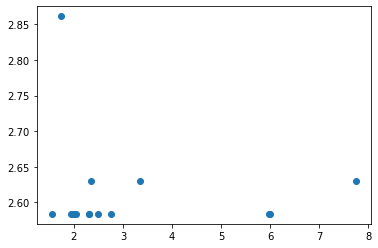

In [ ]:
plt.scatter(y_test, predictions)

(array([6., 4., 2., 0., 0., 0., 0., 2., 0., 1.]),
 array([-1.12156931, -0.4974146 ,  0.12674012,  0.75089484,  1.37504955,
         1.99920427,  2.62335898,  3.2475137 ,  3.87166841,  4.49582313,
         5.11997784]),
 <a list of 10 Patch objects>)

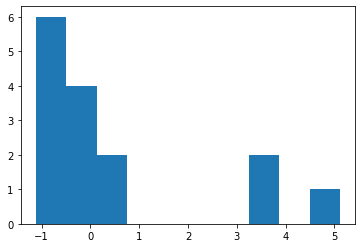

In [ ]:
plt.hist(y_test - predictions)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predictions)


1.2166073852295411

In [ ]:
metrics.mean_squared_error(y_test, predictions)

3.594606709890477

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.8959448066572182